# PCA : House prices 

## We load the libs

In [1]:
import pandas as pd
import sklearn 
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#vérification - librairie numpy
import numpy as np
#classe pour l'ACP
from sklearn.decomposition import PCA
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## We load ours data

In [2]:
X_train = pd.read_csv('datasets/x_train_formatted.csv', index_col=0)
X_test = pd.read_csv('datasets/x_test_formatted.csv', index_col=0)
# y_train = pd.read_csv('datasets/y_train.csv')
# y_test = pd.read_csv('datasets/y_test.csv')

In [3]:
train_full = pd.read_csv('kaggle-house-prices-train.csv')

In [4]:
y = train_full[['Id','SalePrice']]

In [5]:
y 

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000
5,6,143000
6,7,307000
7,8,200000
8,9,129900
9,10,118000


In [6]:
X = pd.concat([X_train, X_test])
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,NbSmPrice
Id,,,,,,,,,,,,,,,,,,,,,
373,120,50.0,7175,6,5,1984,1984,0.0,623,121,...,0,0,1,0,0,0,0,1,0,122
415,60,59.0,11228,7,5,1993,1993,0.0,50,531,...,0,0,1,0,0,0,0,1,0,122
688,160,0.0,5105,7,5,2004,2004,0.0,239,0,...,0,0,1,0,0,0,0,1,0,139
1030,160,21.0,1680,6,7,1972,1972,281.0,317,0,...,0,0,1,0,0,0,0,1,0,91
502,60,75.0,9803,7,5,2005,2005,0.0,400,0,...,0,0,1,0,0,0,0,1,0,139
1147,20,0.0,11200,6,5,1985,1985,85.0,1258,0,...,0,0,1,0,0,0,0,1,0,122
847,60,75.0,9317,7,5,1993,1993,137.0,513,0,...,0,0,1,0,0,0,0,1,0,122
184,50,63.0,11426,7,5,2003,2003,0.0,0,0,...,0,0,1,0,0,0,0,1,0,90
852,120,0.0,3196,8,5,2003,2003,40.0,0,0,...,0,0,1,0,0,0,0,1,0,139


In [7]:
data = X.join(y)
data.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,NbSmPrice,Id,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
373,120,50.0,7175,6,5,1984,1984,0.0,623,121,...,1,0,0,0,0,1,0,122,374.0,123000.0
415,60,59.0,11228,7,5,1993,1993,0.0,50,531,...,1,0,0,0,0,1,0,122,416.0,181134.0
688,160,0.0,5105,7,5,2004,2004,0.0,239,0,...,1,0,0,0,0,1,0,139,689.0,392000.0
1030,160,21.0,1680,6,7,1972,1972,281.0,317,0,...,1,0,0,0,0,1,0,91,1031.0,160000.0
502,60,75.0,9803,7,5,2005,2005,0.0,400,0,...,1,0,0,0,0,1,0,139,503.0,140000.0


In [8]:
data_num =  data.drop(['Id'], axis=1)
data_num.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,NbSmPrice,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
373,120,50.0,7175,6,5,1984,1984,0.0,623,121,...,0,1,0,0,0,0,1,0,122,123000.0
415,60,59.0,11228,7,5,1993,1993,0.0,50,531,...,0,1,0,0,0,0,1,0,122,181134.0
688,160,0.0,5105,7,5,2004,2004,0.0,239,0,...,0,1,0,0,0,0,1,0,139,392000.0
1030,160,21.0,1680,6,7,1972,1972,281.0,317,0,...,0,1,0,0,0,0,1,0,91,160000.0
502,60,75.0,9803,7,5,2005,2005,0.0,400,0,...,0,1,0,0,0,0,1,0,139,140000.0


## We select numeric columns

## We convert all columns in float64

In [9]:
data_float = data_num.astype('float64')
data_ok = data_float.dropna()

## We get the shape of ours data
* we keep the number of observations in the variable n
* we keep the number of features in the variable p

In [10]:
data_ok.shape

(1457, 306)

In [11]:
n = data_ok.shape[0]

p = data_ok.shape[1]

## We standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

* instanciation
* transformation - centering-reduction

In [12]:
sc = StandardScaler()

data_cr = sc.fit_transform(data_ok)

## We calculate the mean

In [13]:
np.mean(data_cr,axis=0)


array([ 1.43864178e-16,  6.82745251e-17, -4.51099541e-17,  1.15822855e-17,
        1.78611034e-16, -3.23572481e-15,  2.43106077e-15,  1.82878192e-17,
        2.92605107e-17, -3.65756384e-17,  4.14523902e-17, -2.43837589e-16,
        4.87675179e-17, -4.14523902e-17,  2.43837589e-18,  5.91306155e-17,
       -6.82745251e-17,  2.07261951e-17,  9.78398328e-17,  2.92605107e-17,
        3.41372625e-17, -1.92631696e-16,  7.31512768e-17,  4.38907661e-17,
       -3.41372625e-17,  6.33977733e-17, -8.77815322e-17, -4.87675179e-18,
       -3.77948264e-17,  1.52398493e-17, -2.43837589e-17, -2.92605107e-17,
       -1.21918795e-18, -2.68221348e-17,  1.41425802e-16,  2.70098898e-14,
        1.92631696e-16,  1.21918795e-17, -9.75350358e-18,  6.09593974e-18,
        4.87675179e-18, -2.68221348e-17,  8.53431563e-18, -1.34720268e-16,
       -2.04823575e-16,  1.95070072e-17, -4.87675179e-18,  4.87675179e-18,
       -4.87675179e-18,  1.46302554e-17, -9.75350358e-17, -2.07261951e-17,
        1.88974132e-17,  

## We compute the standard deviation

In [14]:
np.std(data_cr,axis=0,ddof=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## We initialyse the model

In [15]:
acp = PCA(svd_solver='full')

## We print the settings

In [16]:
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)


## We calculate the coordinates
* number of computed components : 6

In [17]:
coord = acp.fit_transform(data_cr)

print(acp.n_components_) # 6

306


In [18]:
pprint(coord[1])

array([-3.96671461e+00, -7.32463150e-02,  1.77105909e-01,  9.34841906e-01,
        1.59757219e+00,  3.88107726e+00,  1.80638180e+00, -1.87203195e+00,
        6.40632911e-01, -4.59931286e-01, -6.60206604e-01, -2.20745426e-01,
        1.20086400e+00, -4.67169945e-01,  2.99372529e+00,  4.14175120e-01,
       -2.24596940e+00, -2.46504618e+00,  2.37511120e+00,  4.22180600e-01,
       -1.07375993e+00, -6.80514263e-01,  7.37518758e-01, -6.25431817e-01,
        9.56928546e-01,  1.61796992e+00, -5.08628880e-02, -2.33966445e+00,
        2.85974838e-01, -1.79128295e+00,  2.73804639e-01,  2.15768351e-01,
       -1.74741137e+00, -4.04040498e-01, -2.44946815e+00,  6.86353404e-01,
       -1.30365140e+00, -5.87778308e-01, -2.14347405e-01,  7.38300731e-01,
       -2.81426387e-01,  1.55484379e+00, -1.32878468e+00, -7.54985946e-01,
       -6.62855178e-02,  6.49341155e-01, -3.37822907e-01,  3.09251867e+00,
        2.13304913e+00,  1.38992918e+00, -3.73095754e-01, -5.66820564e-01,
        4.29912955e-01,  

## Explained variance

In [19]:
print(acp.explained_variance_)

[1.99186910e+01 8.99702593e+00 7.49872188e+00 6.83326859e+00
 6.32272473e+00 5.46251153e+00 4.68132373e+00 4.50875138e+00
 3.76042056e+00 3.56326164e+00 3.54287054e+00 3.44843373e+00
 3.25053886e+00 3.10814678e+00 2.98883357e+00 2.92309378e+00
 2.85144027e+00 2.79979925e+00 2.72988651e+00 2.69230646e+00
 2.59913893e+00 2.56520686e+00 2.48943091e+00 2.43066336e+00
 2.39420807e+00 2.36367669e+00 2.29818317e+00 2.27513112e+00
 2.21902001e+00 2.21751244e+00 2.17253883e+00 2.13622036e+00
 2.11622341e+00 2.08908846e+00 2.06224765e+00 2.04695127e+00
 2.02016850e+00 1.98526947e+00 1.94129109e+00 1.93303204e+00
 1.89159317e+00 1.87676273e+00 1.84739229e+00 1.84356584e+00
 1.78864650e+00 1.75873559e+00 1.74603348e+00 1.73723807e+00
 1.71962561e+00 1.65924063e+00 1.65177263e+00 1.63691976e+00
 1.61758288e+00 1.60751411e+00 1.57223286e+00 1.56599430e+00
 1.55296018e+00 1.52829432e+00 1.51154943e+00 1.49217680e+00
 1.48385852e+00 1.46530284e+00 1.44421595e+00 1.43148779e+00
 1.42821483e+00 1.410736

## Corrected value

In [20]:
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.99050200e+01 8.99085089e+00 7.49357519e+00 6.82857863e+00
 6.31838518e+00 5.45876238e+00 4.67811075e+00 4.50565683e+00
 3.75783963e+00 3.56081603e+00 3.54043892e+00 3.44606693e+00
 3.24830788e+00 3.10601353e+00 2.98678221e+00 2.92108754e+00
 2.84948321e+00 2.79787764e+00 2.72801288e+00 2.69045862e+00
 2.59735503e+00 2.56344625e+00 2.48772231e+00 2.42899510e+00
 2.39256482e+00 2.36205440e+00 2.29660583e+00 2.27356960e+00
 2.21749701e+00 2.21599047e+00 2.17104773e+00 2.13475418e+00
 2.11477096e+00 2.08765463e+00 2.06083224e+00 2.04554636e+00
 2.01878197e+00 1.98390690e+00 1.93995870e+00 1.93170532e+00
 1.89029489e+00 1.87547463e+00 1.84612435e+00 1.84230052e+00
 1.78741888e+00 1.75752850e+00 1.74483510e+00 1.73604573e+00
 1.71844536e+00 1.65810183e+00 1.65063895e+00 1.63579627e+00
 1.61647266e+00 1.60641081e+00 1.57115377e+00 1.56491950e+00
 1.55189432e+00 1.52724539e+00 1.51051199e+00 1.49115266e+00
 1.48284008e+00 1.46429714e+00 1.44322472e+00 1.43050530e+00
 1.42723459e+00 1.409768

## proportion of variance explained

In [21]:
print(acp.explained_variance_ratio_)

[6.50490850e-02 2.93818657e-02 2.44888078e-02 2.23156164e-02
 2.06483176e-02 1.78390927e-02 1.52879436e-02 1.47243687e-02
 1.22805217e-02 1.16366537e-02 1.15700618e-02 1.12616566e-02
 1.06153852e-02 1.01503710e-02 9.76072617e-03 9.54603770e-03
 9.31203662e-03 9.14339097e-03 8.91507476e-03 8.79234844e-03
 8.48808834e-03 8.37727532e-03 8.12981148e-03 7.93789247e-03
 7.81883929e-03 7.71913202e-03 7.50524780e-03 7.42996602e-03
 7.24672225e-03 7.24179893e-03 7.09492722e-03 6.97632084e-03
 6.91101621e-03 6.82240076e-03 6.73474589e-03 6.68479202e-03
 6.59732670e-03 6.48335588e-03 6.33973432e-03 6.31276248e-03
 6.17743430e-03 6.12900204e-03 6.03308610e-03 6.02058994e-03
 5.84123816e-03 5.74355718e-03 5.70207549e-03 5.67335205e-03
 5.61583452e-03 5.41863342e-03 5.39424494e-03 5.34573946e-03
 5.28259040e-03 5.24970852e-03 5.13448945e-03 5.11411601e-03
 5.07155008e-03 4.99099799e-03 4.93631371e-03 4.87304790e-03
 4.84588262e-03 4.78528479e-03 4.71642065e-03 4.67485393e-03
 4.66416532e-03 4.607086

## we showing scree plot

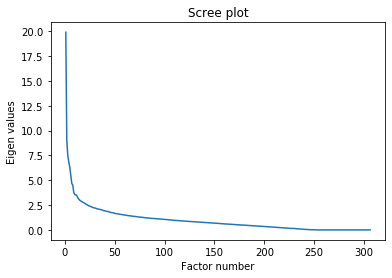

In [22]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


## We showing cumulative variance explained plot

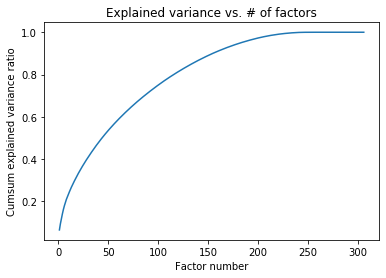

In [23]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


## Thresholds for testing broken sticks

In [24]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]


## broken sticks test

In [25]:
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


       Val.Propre    Seuils
0    1.990502e+01  6.302434
1    8.990851e+00  5.302434
2    7.493575e+00  4.802434
3    6.828579e+00  4.469101
4    6.318385e+00  4.219101
5    5.458762e+00  4.019101
6    4.678111e+00  3.852434
7    4.505657e+00  3.709577
8    3.757840e+00  3.584577
9    3.560816e+00  3.473466
10   3.540439e+00  3.373466
11   3.446067e+00  3.282557
12   3.248308e+00  3.199223
13   3.106014e+00  3.122300
14   2.986782e+00  3.050872
15   2.921088e+00  2.984205
16   2.849483e+00  2.921705
17   2.797878e+00  2.862881
18   2.728013e+00  2.807326
19   2.690459e+00  2.754694
20   2.597355e+00  2.704694
21   2.563446e+00  2.657075
22   2.487722e+00  2.611621
23   2.428995e+00  2.568142
24   2.392565e+00  2.526476
25   2.362054e+00  2.486476
26   2.296606e+00  2.448014
27   2.273570e+00  2.410977
28   2.217497e+00  2.375263
29   2.215990e+00  2.340780
..            ...       ...
276  2.217845e-31  0.103007
277  2.105797e-31  0.099397
278  1.800569e-31  0.095800
279  1.766617e-31  0

## We display the dimensions two by two

In [26]:
coord_df = pd.DataFrame(coord)
coord_ok = coord_df.T
coord_ok

,0,1,2,3,4,5,6,7,8,9,...,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456
0,2.372408e+00,-3.966715e+00,-1.453771e+00,3.464368e+00,-3.355801e+00,-1.448188e+00,-2.672020e+00,1.588348e-01,-4.561801e+00,4.150976e+00,...,-3.566820e+00,4.446454e+00,4.727659e+00,-9.250387e-01,7.920906e-01,2.681777e+00,-8.480795e+00,-1.671758e+00,-3.613658e+00,7.698645e+00
1,-4.133822e+00,-7.324632e-02,2.889035e+00,-1.140562e+00,2.961982e+00,-1.841108e+00,-4.717096e-01,3.786851e+00,1.857814e+00,3.888614e+00,...,-4.178467e+00,-1.740879e+00,7.490470e-01,-3.389255e+00,-4.128744e+00,-4.152919e-01,2.737818e+00,-2.950604e+00,-1.083073e+00,6.521208e+00
2,1.231567e+00,1.771059e-01,-1.556142e+00,-2.564926e+00,-1.339665e+00,3.596624e-01,-5.590369e-01,-1.991910e+00,5.106478e-01,-3.275597e+00,...,1.495183e+00,-1.303919e+00,-3.695000e+00,-5.223125e-01,-7.709363e-02,-2.622093e+00,8.116546e-01,2.632063e-02,-5.642884e-01,-2.276132e+00
3,-4.007190e+00,9.348419e-01,-5.102461e+00,-3.629104e+00,-2.924080e+00,-1.188442e+00,-8.044399e-01,1.064523e+00,-2.706551e+00,2.626345e+00,...,3.197051e+00,1.441907e+00,-3.860528e-01,2.217656e+00,-5.852464e-01,1.195443e+00,2.250535e+00,2.863612e+00,2.242262e+00,5.942777e+00
4,-7.863273e-01,1.597572e+00,2.527901e+00,1.941113e+00,1.837224e+00,-3.834468e-01,1.286622e+00,2.258440e+00,-2.907196e-01,2.419629e+00,...,-2.412891e+00,1.801139e+00,1.949819e+00,8.252169e-01,-9.414425e-01,1.197616e+00,-1.275874e+00,3.504492e-01,1.006050e-01,2.254293e+00
5,9.388484e-01,3.881077e+00,1.841962e+00,3.139396e+00,1.978255e+00,3.965396e-01,3.447253e+00,3.710319e-01,1.178387e-01,-7.014985e-01,...,-2.301231e-01,-1.095655e+00,-2.511397e+00,3.515620e+00,-9.044706e-02,-2.513407e-01,-4.810787e+00,4.320351e+00,3.936260e+00,-1.861363e+00
6,1.383154e+00,1.806382e+00,4.415844e+00,-3.489981e-01,1.220680e+00,3.764485e-01,-3.449366e-01,9.257466e-01,1.531868e+00,2.088992e+00,...,-1.129095e+00,-1.645725e+00,5.649968e-01,-2.925470e+00,-4.348340e-01,-5.277445e-01,-2.045813e+00,-1.360169e+00,-2.073987e+00,-1.809348e+00
7,2.082894e+00,-1.872032e+00,2.396516e+00,5.766023e+00,-5.012917e-01,-3.260143e-01,-6.802646e-02,-1.178909e+00,1.470418e-01,-1.434847e+00,...,1.397323e+00,-8.456217e-01,-1.596719e+00,1.293819e+00,-1.569988e+00,2.367731e+00,-2.653863e-01,5.562944e-01,3.022539e+00,1.647776e+00
8,1.890398e+00,6.406329e-01,4.641492e-01,-1.828686e+00,7.728610e-01,-3.538009e-01,-8.990028e-01,4.632612e-01,-5.526976e-03,8.107470e-01,...,-5.317430e-01,-5.431376e-02,1.511020e+00,-8.365656e-01,-1.360198e+00,3.170679e-01,1.394277e-01,-2.260042e-01,-1.021199e-01,4.994746e-01
9,1.039211e+00,-4.599313e-01,-9.830265e-01,8.213003e-01,-5.117416e-01,2.158507e+00,2.016743e+00,-7.583062e-01,2.057412e+00,-2.095549e+00,...,1.780527e+00,1.035600e-01,-3.163428e-01,1.066709e-01,-3.562024e-01,-2.187526e+00,-1.711968e+00,1.287095e+00,7.289971e-01,7.459825e+00


In [27]:
marker =  [".",",","o","v","^","<",">",".",",","o","v","^","<",">",".",",","o","v","^","<",">",".",",","o","v","^"]
neighborhood = pd.unique(train_full["Neighborhood"]).tolist()
neighborhood_all = [train_full.loc[Neighborhood_id, "Neighborhood"] for Neighborhood_id in data_ok.index]
 
markers = {}
for i in range(25):
    markers[neighborhood[i]] = marker[i]
    
len(neighborhood_all) 

1457

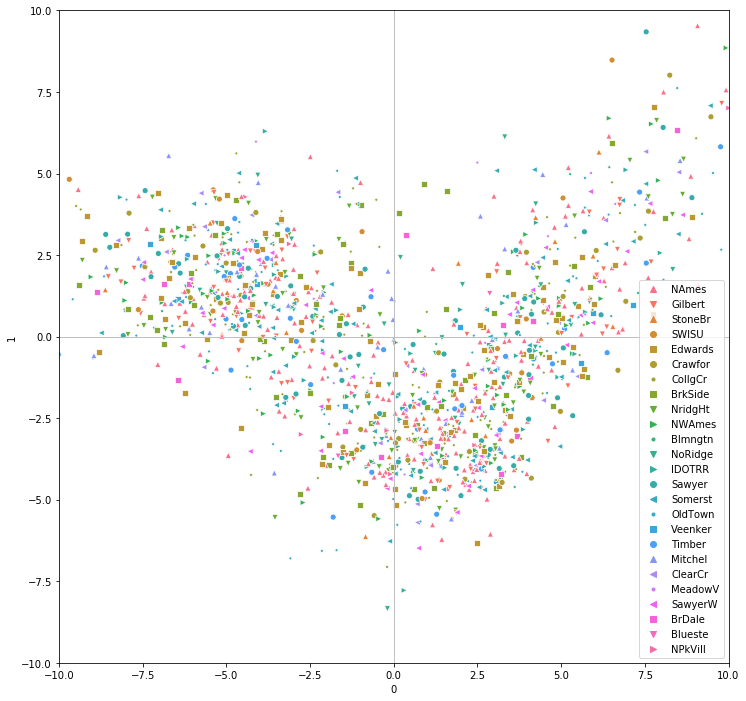

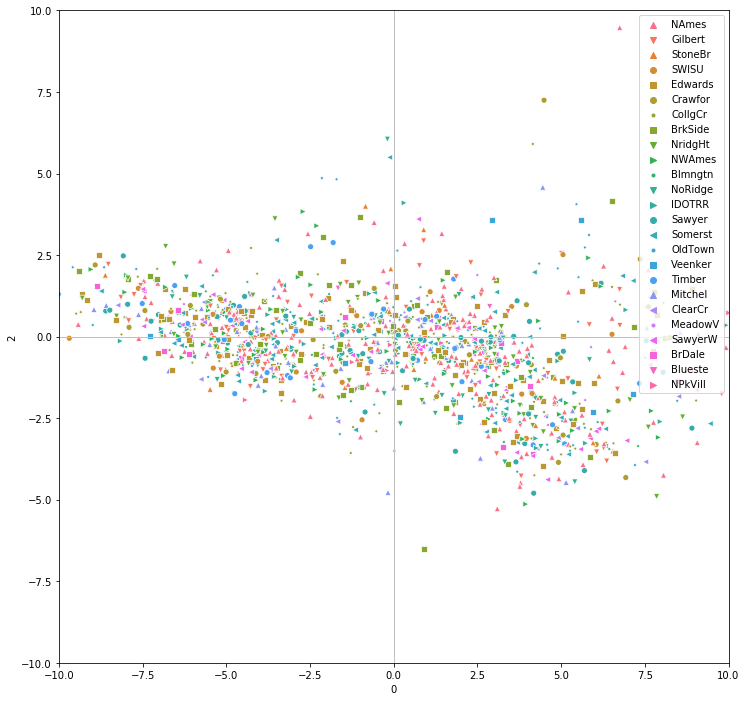

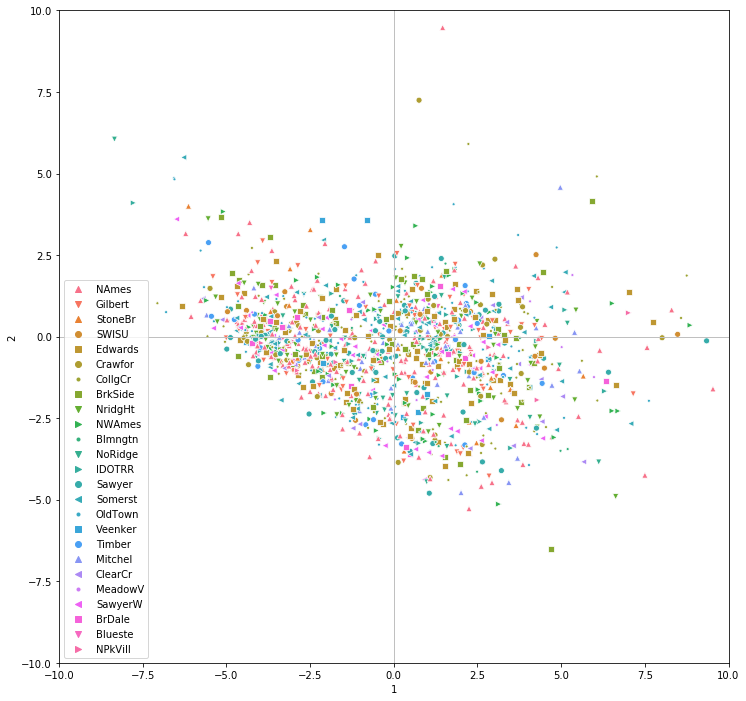

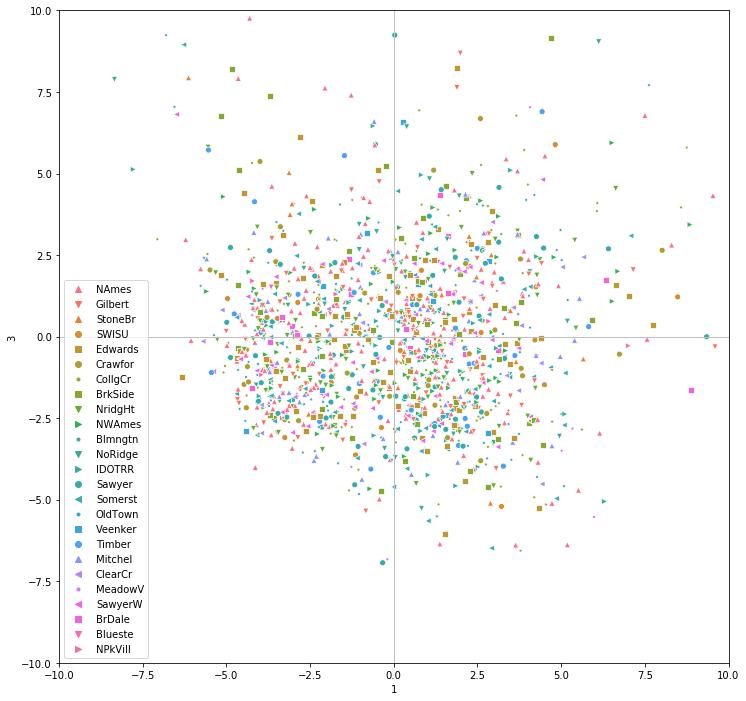

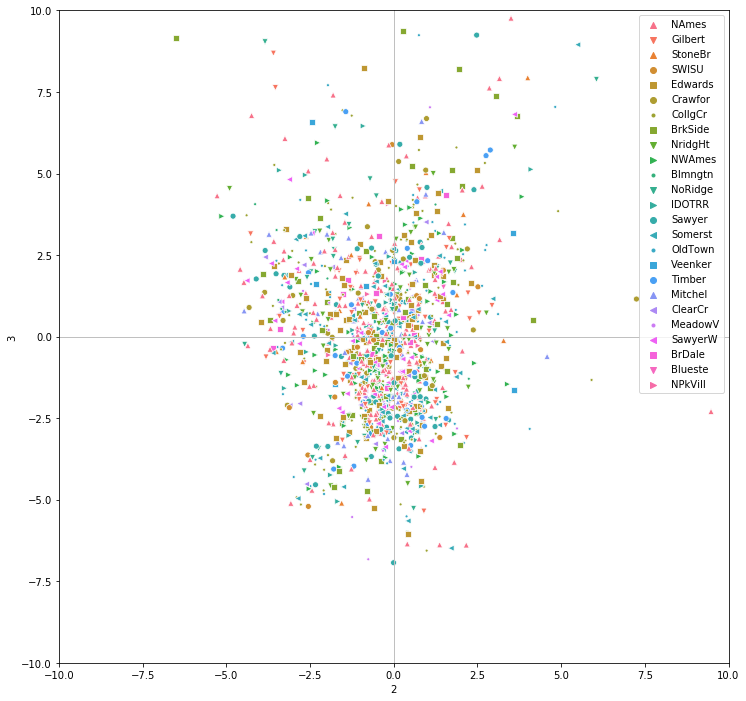

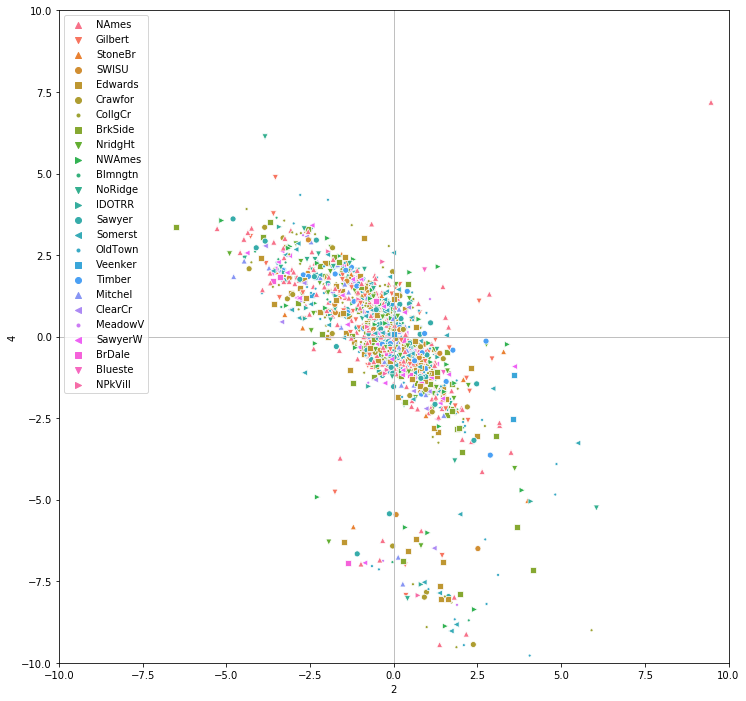

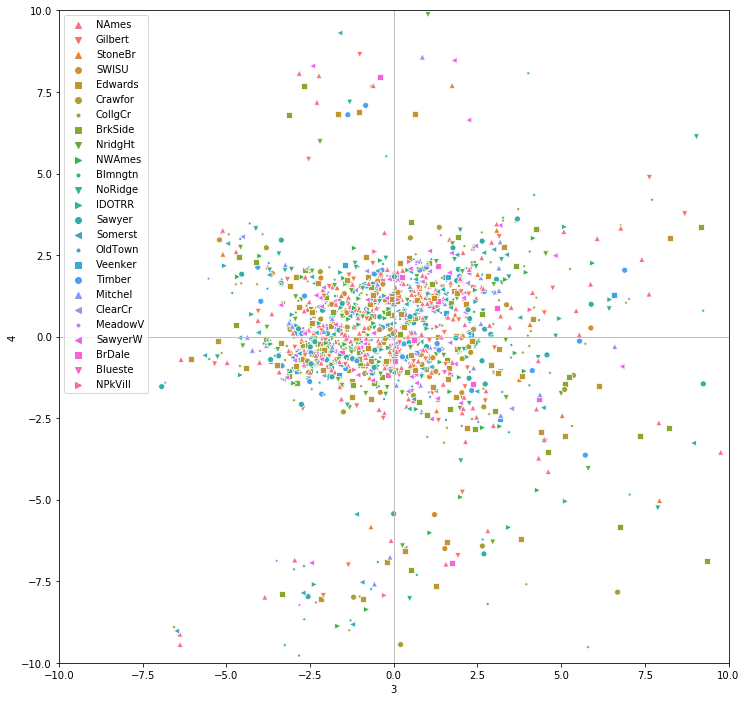

In [28]:
a1=[0,0,1,1,2,2,3]
a2=[1,2,2,3,3,4,4]

# markers = pd.unique(data_quali["Neighborhood"]).tolist()
for a in range(7): 
    #positionnement des individus dans le premier plan
    fig, axes = plt.subplots(figsize=(12,12))
    axes.set_xlim(-10,10) #même limites en abscisse
    axes.set_ylim(-10,10) #et en ordonnée
    #placement des étiquettes des observations
    
    sns.scatterplot(coord_ok.iloc[a1[a]],coord_ok.iloc[a2[a]],  data=coord_ok, style=neighborhood_all,  hue=neighborhood_all,  markers=markers)
    
    #ajouter les axes
    plt.plot([-10,10],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-10,10],color='silver',linestyle='-',linewidth=1)
    #affichage
    plt.show()

## contribution of individuals in total inertia

In [29]:
di = np.sum(data_cr**2,axis=1)
print(pd.DataFrame({'ID':data_ok.index,'d_i':di}))


        ID          d_i
0      373   182.760817
1      415   285.825922
2      688   214.261367
3     1030   241.654906
4      502   103.424405
5     1147   127.707490
6      847   100.538837
7      184   233.099723
8      852   181.183569
9      532  1265.855682
10      45   176.431837
11    1044   166.363301
12     135   185.011466
13     229   199.284709
14    1306   222.274467
15    1178   253.344759
16     218   278.351080
17     718   166.854106
18    1200   163.565137
19      61   253.132754
20    1079   120.340744
21     388   207.745912
22    1312   104.094198
23     563   272.679911
24     999   347.581747
25     879   258.052818
26    1354   250.725897
27     416   114.369340
28     604   192.153637
29    1371  3182.928987
...    ...          ...
1427   947   175.071250
1428   632   181.645068
1429  1442   117.965723
1430   227   132.666965
1431   518   131.823739
1432  1346   175.730407
1433  1095   119.633633
1434   620   148.650573
1435  1128   354.657509
1436  1082   167

## Quality of representation of individuals - COS2

In [30]:
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data_ok.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'COS2_3':cos2[:,2],'COS2_4':cos2[:,3],'COS2_5':cos2[:,4]}))

        id    COS2_1    COS2_2    COS2_3    COS2_4    COS2_5
0      373  0.030796  0.093502  0.008299  0.087861  0.003383
1      415  0.055050  0.000019  0.000110  0.003058  0.008929
2      688  0.009864  0.038955  0.011302  0.121511  0.029825
3     1030  0.049665  0.005383  0.027224  0.054501  0.015592
4      502  0.108885  0.084829  0.017353  0.082671  0.032636
5     1147  0.016422  0.026543  0.001013  0.011060  0.001151
6      847  0.071014  0.002213  0.003108  0.006437  0.016465
7      184  0.000108  0.061520  0.017021  0.004861  0.021881
8      852  0.114856  0.019050  0.001439  0.040431  0.000466
9      532  0.013612  0.011946  0.008476  0.005449  0.004625
10      45  0.051781  0.063485  0.000397  0.006770  0.000742
11    1044  0.096376  0.002693  0.000016  0.015628  0.002009
12     135  0.001917  0.093804  0.000032  0.011801  0.000748
13     229  0.065453  0.106599  0.001586  0.020475  0.000055
14    1306  0.250607  0.000505  0.012160  0.017583  0.021795
15    1178  0.189637  0.

## Online sum of cos2 = 1

In [32]:
print(np.sum(cos2,axis=1))


[1. 1. 1. ... 1. 1. 1.]


## Contributions to the axes

In [33]:
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':data_ok.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2],'CTR_4':ctr[:,3],'CTR_5':ctr[:,4],'CTR_6':ctr[:,5]}))

        id         CTR_1         CTR_2         CTR_3         CTR_4  \
0      373  1.940691e-04  1.304497e-03  1.389209e-04  1.613950e-03   
1      415  5.425500e-04  4.095540e-07  2.872880e-06  8.783882e-05   
2      688  7.287354e-05  6.371551e-04  2.217941e-04  2.616794e-03   
3     1030  4.138338e-04  9.930642e-05  6.025612e-04  1.323759e-03   
4      502  3.883025e-04  6.697374e-04  1.643779e-04  8.593868e-04   
5     1147  7.231486e-05  2.587606e-04  1.184790e-05  1.419600e-04   
6      847  2.461825e-04  1.698592e-05  2.862414e-05  6.504252e-05   
7      184  8.698997e-07  1.094702e-03  3.634048e-04  1.138992e-04   
8      852  7.175473e-04  2.634780e-04  2.388330e-05  7.362795e-04   
9      532  5.941255e-04  1.154328e-03  9.827256e-04  6.932878e-04   
10      45  3.150095e-04  8.550487e-04  6.408589e-06  1.200538e-04   
11    1044  5.528451e-04  3.420519e-05  2.406337e-07  2.613143e-04   
12     135  1.222933e-05  1.324827e-03  5.391280e-07  2.194426e-04   
13     229  4.497572

In [34]:
np.sum(ctr,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## The components_ field of the PCA object

In [35]:
print(acp.components_)

[[ 1.03617362e-02 -2.97100503e-02 -3.14700923e-02 ... -9.10934030e-02
  -1.77757089e-01  2.60619121e-03]
 [ 9.75939807e-02  3.02279923e-02 -6.94344075e-02 ...  1.02372610e-01
   1.63755201e-02 -5.62016691e-03]
 [-9.69056864e-03  5.34560053e-03  4.83343984e-02 ...  1.56077557e-02
   6.64714925e-02  4.95238327e-03]
 ...
 [ 0.00000000e+00 -3.53917907e-17 -6.50441734e-17 ...  1.59119987e-03
  -2.89957324e-02 -2.08166817e-17]
 [ 0.00000000e+00  1.05851306e-16 -1.46413966e-17 ...  1.09847393e-02
  -6.92492263e-03 -1.43114687e-17]
 [ 0.00000000e+00 -3.00276193e-17  1.51533172e-16 ...  1.28980044e-02
   5.78181032e-03 -1.58293517e-16]]


## square root of eigenvalues

In [36]:
sqrt_eigval = np.sqrt(eigval)

## correlation of variables with axes
* We print the matrix of variable correlations x factors

In [37]:
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

print(corvar)

[[ 4.62289298e-02  2.92633088e-01 -2.65273457e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.32551515e-01  9.06378720e-02  1.46332582e-02 ... -3.14115880e-33
   7.06844430e-33 -6.86503739e-34]
 [-1.40403950e-01 -2.08197319e-01  1.32312493e-01 ... -5.77292286e-33
  -9.77710150e-34  3.46441349e-33]
 ...
 [-4.06413603e-01  3.06961687e-01  4.27252875e-02 ...  1.41225164e-19
   7.33529143e-19  2.94879463e-19]
 [-7.93064004e-01  4.91015838e-02  1.81961691e-01 ... -2.57348380e-18
  -4.62426319e-19  1.32186117e-19]
 [ 1.16275331e-02 -1.68519286e-02  1.35568497e-02 ... -1.84756130e-33
  -9.55678515e-34 -3.61897127e-33]]


## We displays for the first six axes

In [38]:
ax = pd.DataFrame({'id':data_ok.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3],'COR_5':corvar[:,4], 'COR_6':corvar[:,5]})
ax

,id,COR_1,COR_2,COR_3,COR_4,COR_5,COR_6
0,MSSubClass,0.046229,0.292633,-0.026527,-0.164986,0.099825,0.365833
1,LotFrontage,-0.132552,0.090638,0.014633,0.214794,-0.016532,-0.220269
2,LotArea,-0.140404,-0.208197,0.132312,0.412095,-0.110732,0.025556
3,OverallQual,-0.800945,0.172181,-0.082412,0.205510,0.018644,-0.010997
4,OverallCond,0.215909,-0.191777,-0.255444,0.071706,0.033415,0.072961
5,YearBuilt,-0.828575,0.018942,0.209163,-0.352419,-0.069016,0.079981
6,YearRemodAdd,-0.668258,0.236570,-0.020379,-0.143975,-0.052457,0.076983
7,MasVnrArea,-0.430460,-0.022235,0.060180,0.174054,-0.022454,-0.017126
8,BsmtFinSF1,-0.337719,-0.352154,0.128117,0.082050,-0.308364,-0.098521
9,BsmtFinSF2,0.049586,-0.322052,0.087624,0.117297,-0.083260,0.012390


## We only keeps the features that contributes to more than 0.5 on the axes
* we get the labels
* we get the nuber of values

In [39]:
ax_a = 1
ax_b = 2 
ax_c = 3
my_axes = []
labels = []
nbr_values = []

for a in range(4):
    ax1 = ax[(ax.iloc[:,ax_a] > 0.5) | (ax.iloc[:,ax_a] < -0.5) | (ax.iloc[:,ax_b] > 0.5) | (ax.iloc[:,ax_b] < -0.5)]
    ax2 = ax[(ax.iloc[:,ax_a] > 0.5) | (ax.iloc[:,ax_a] < -0.5) | (ax.iloc[:,ax_c] > 0.5) | (ax.iloc[:,ax_c] < -0.5)]
    ax_np1 = ax1.iloc[:,[ax_a,ax_b]]
    ax_np2 = ax2.iloc[:,[ax_a,ax_c]]
    my_axes.append(np.asarray(ax_np1))
    my_axes.append(np.asarray(ax_np2))
    label1 = ax1['id'].values
    label2 = ax2['id'].values
    labels.append(label1)
    labels.append(label2)
    ax1_s = ax1.shape
    ax2_s = ax2.shape
    nbr_values.append(ax1_s[0])
    nbr_values.append(ax2_s[0])
    ax_a += 1
    ax_b += 1 
    ax_c += 1
    
print(my_axes)
print(labels)
print(nbr_values)


[array([[-0.80094503,  0.17218149],
       [-0.82857515,  0.01894185],
       [-0.66825837,  0.23656953],
       [-0.62033218, -0.14644305],
       [-0.5152363 , -0.16219251],
       [-0.52337581,  0.16595783],
       [-0.58928839,  0.28088087],
       [-0.73646764, -0.05895036],
       [-0.68917345, -0.10435335],
       [-0.67405783,  0.03029286],
       [-0.52652325,  0.36314732],
       [-0.52414503,  0.35991429],
       [-0.65456458,  0.30051195],
       [ 0.71251778, -0.3666756 ],
       [ 0.39971439, -0.59934451],
       [-0.69317927,  0.401788  ],
       [-0.50493185,  0.14577812],
       [ 0.60622082, -0.31899309],
       [-0.51603982,  0.0823225 ],
       [-0.5661773 ,  0.28685824],
       [-0.53065819,  0.18938869],
       [ 0.6063103 , -0.32756857],
       [-0.53671535, -0.30034309],
       [ 0.53453818, -0.2100913 ],
       [-0.793064  ,  0.04910158]]), array([[-0.80094503, -0.08241171],
       [-0.82857515,  0.20916346],
       [-0.66825837, -0.02037883],
       [-0.620332

## We display the correlation circles for the first six dimentions

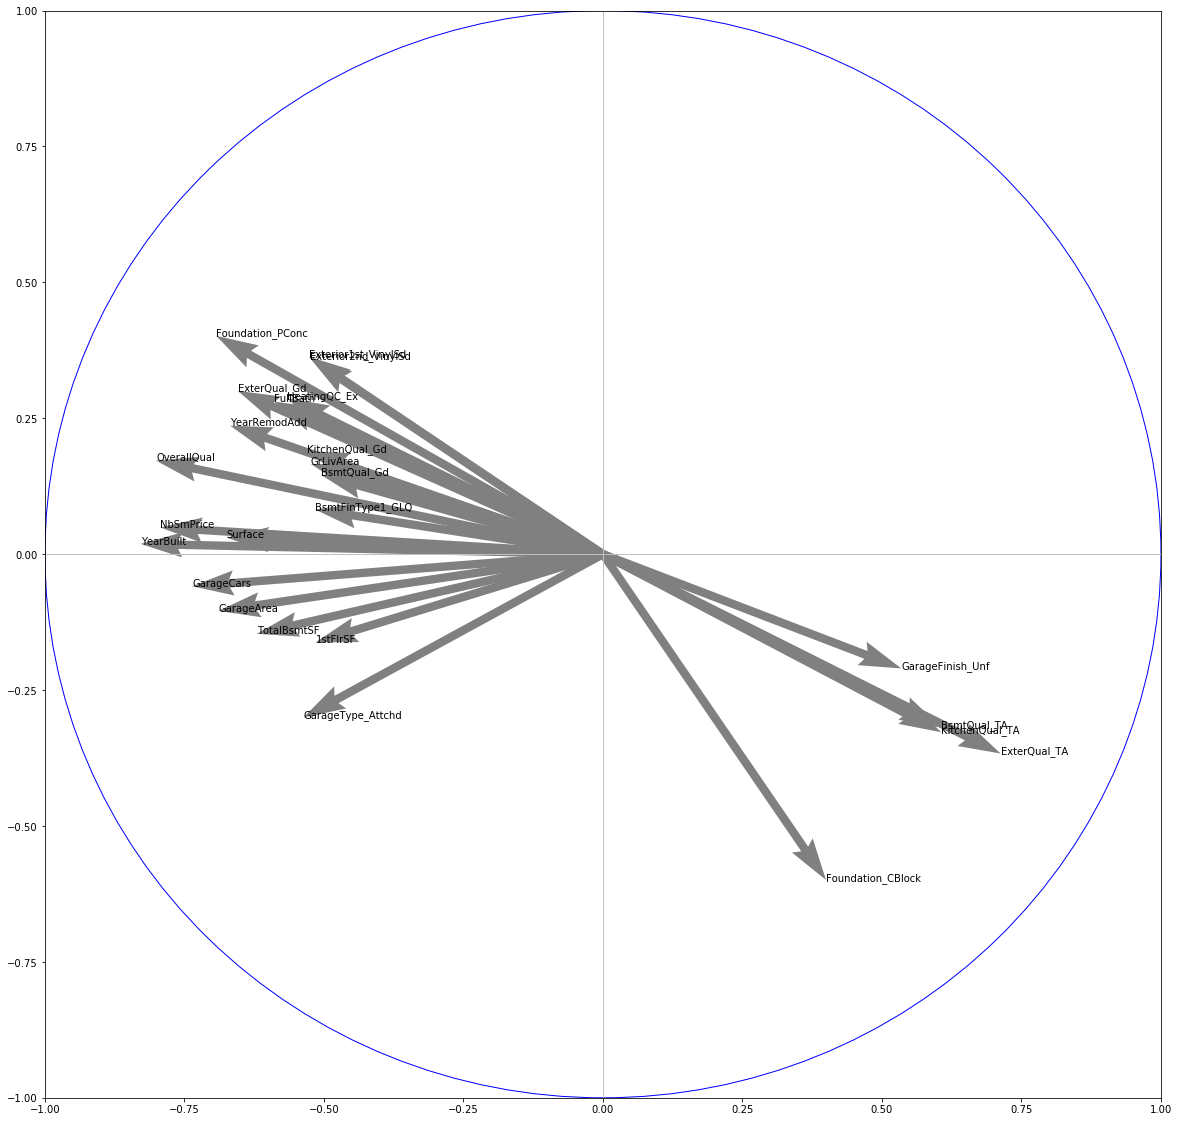

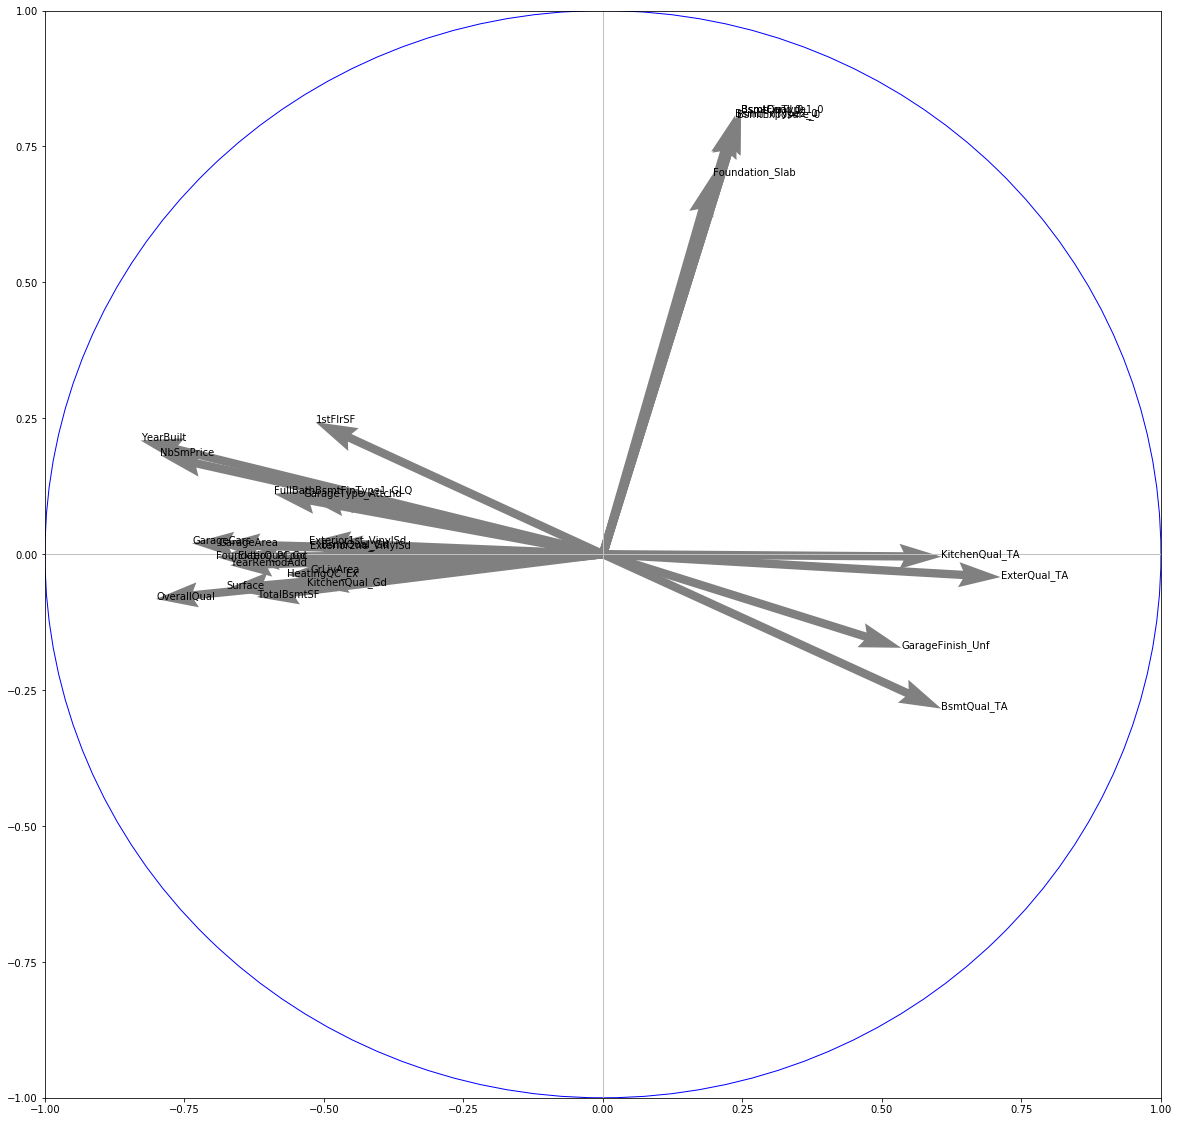

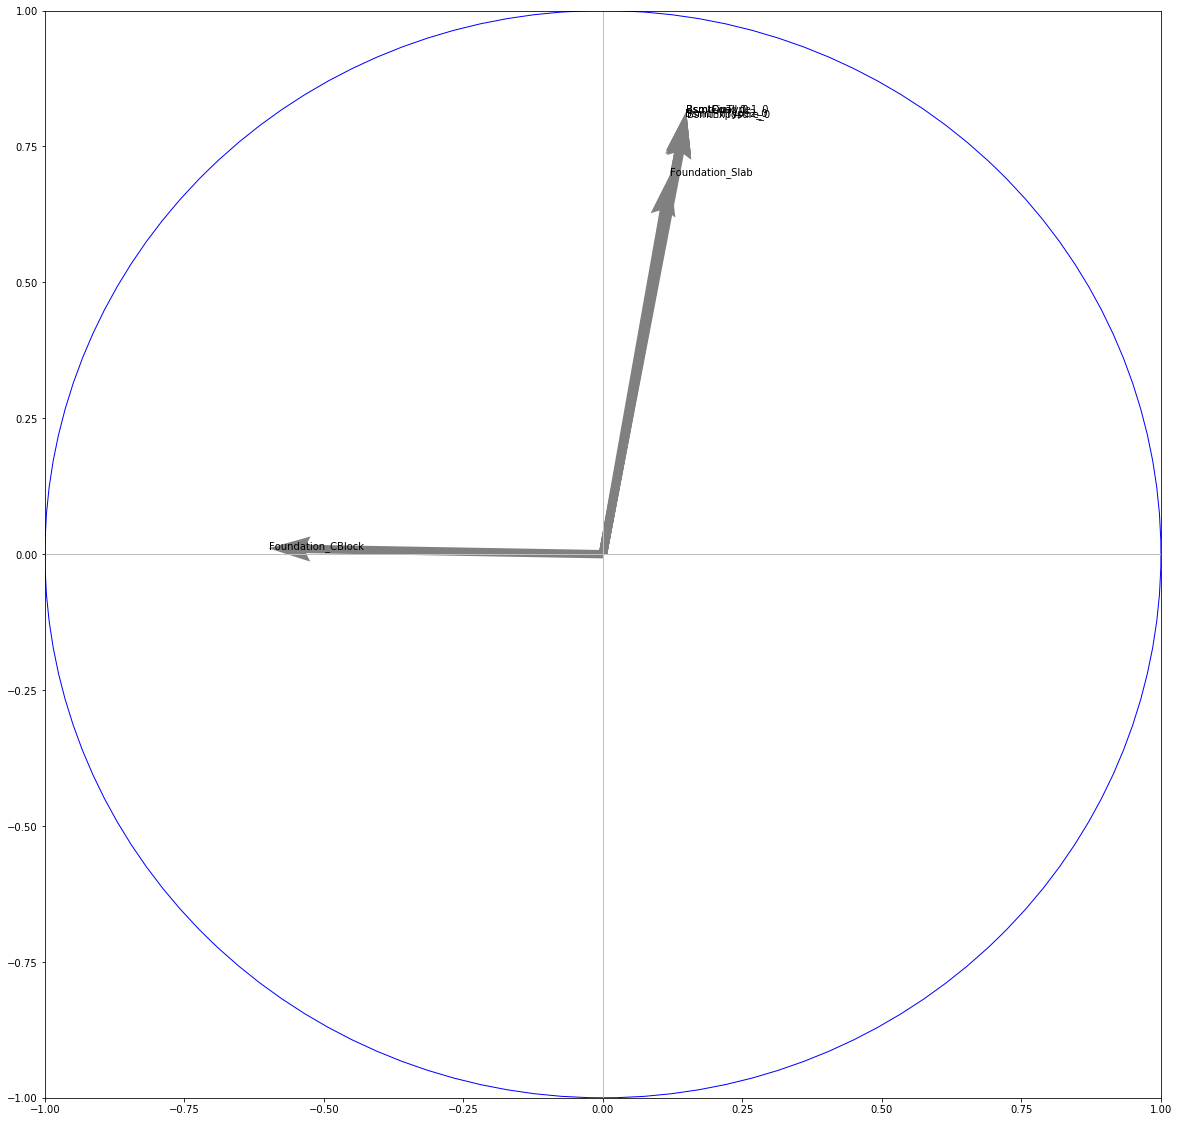

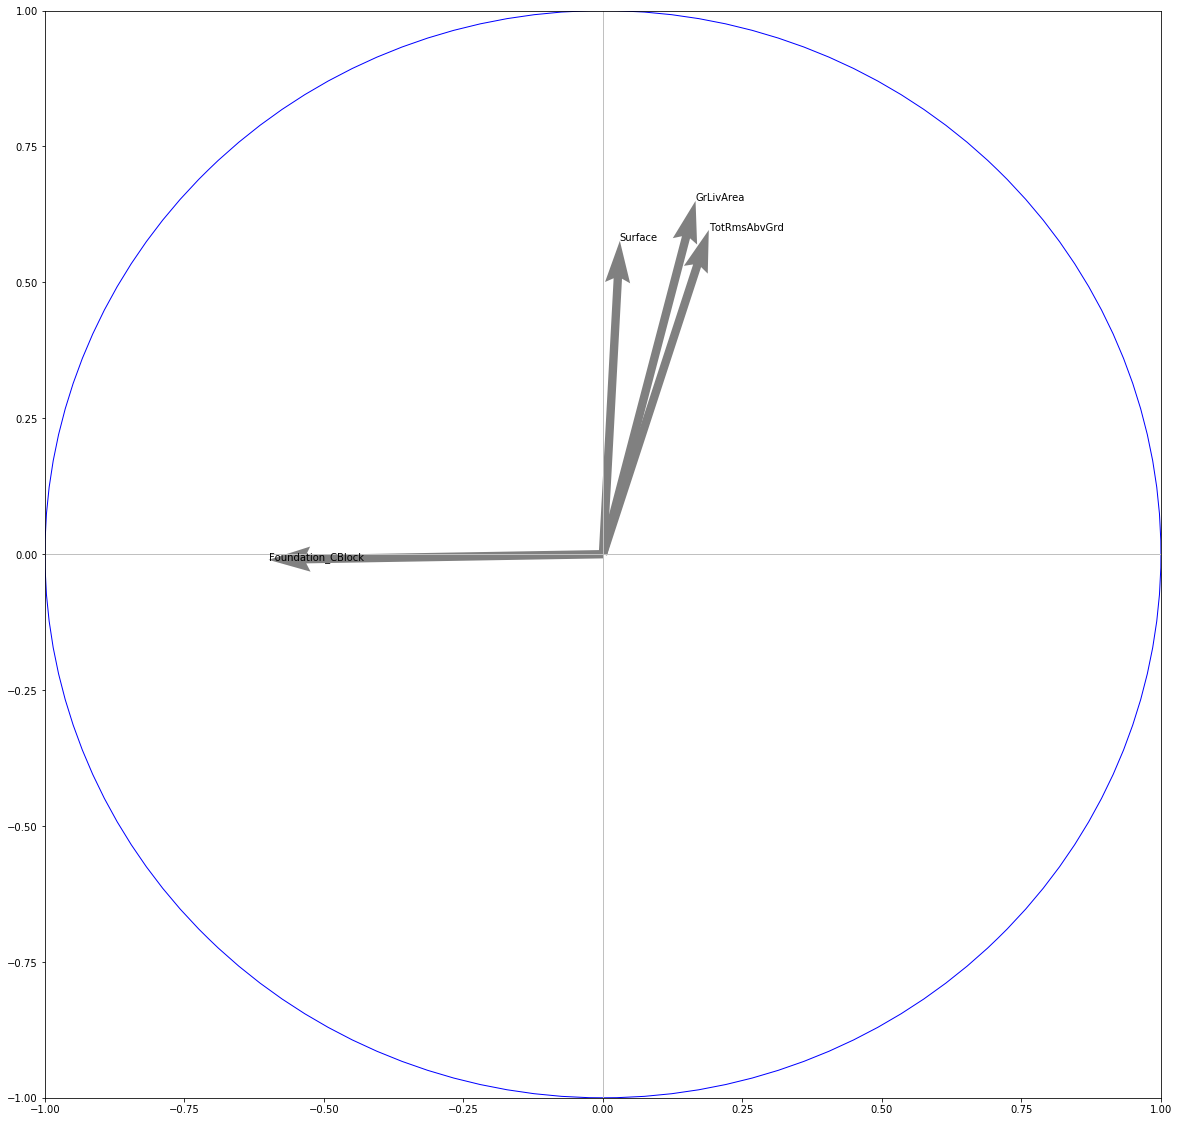

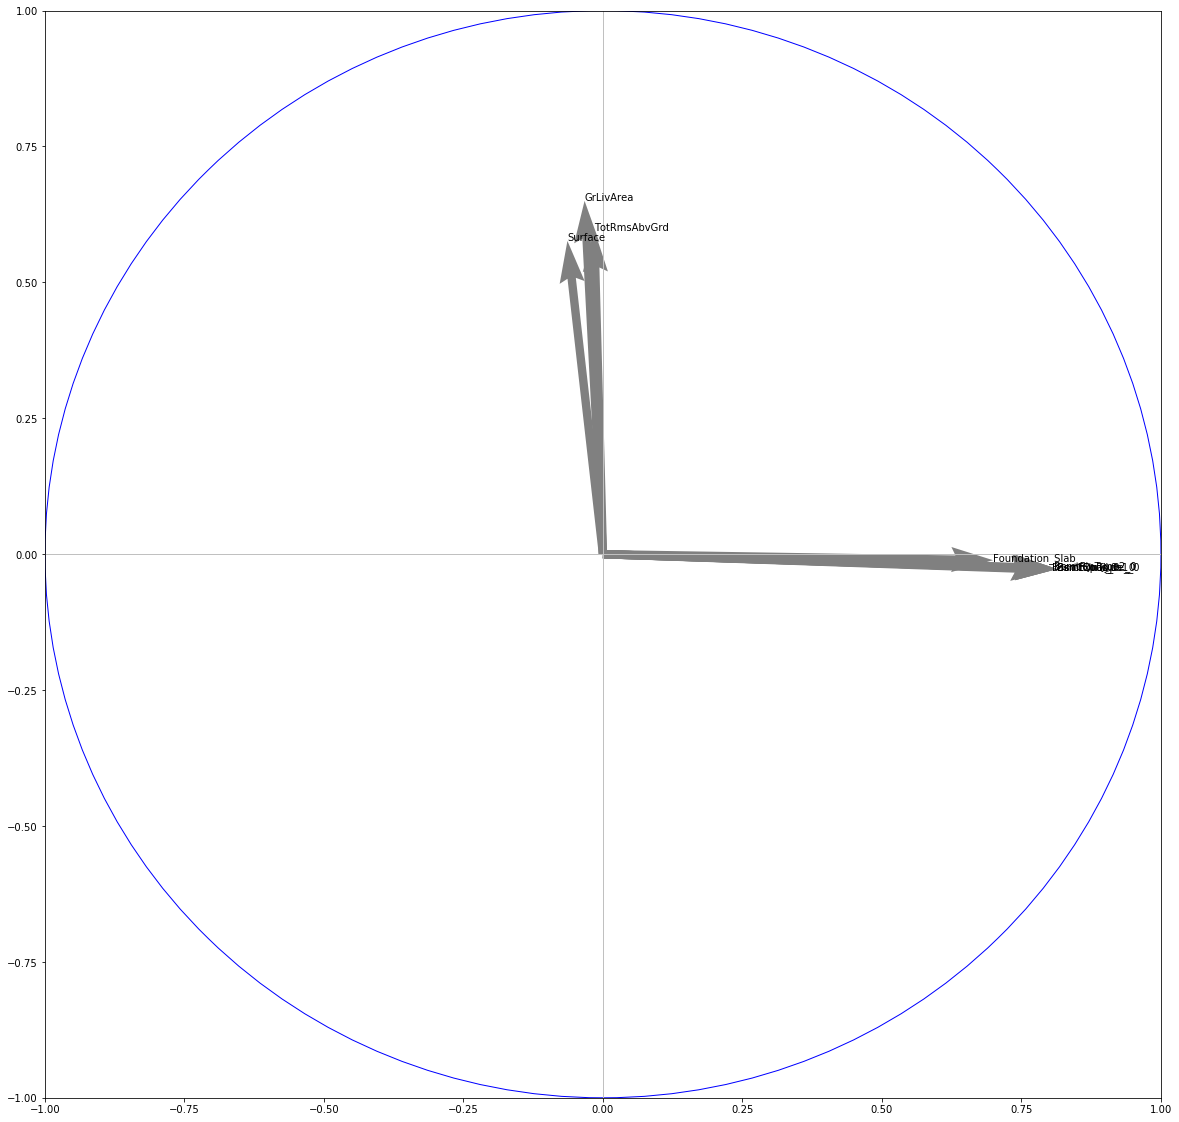

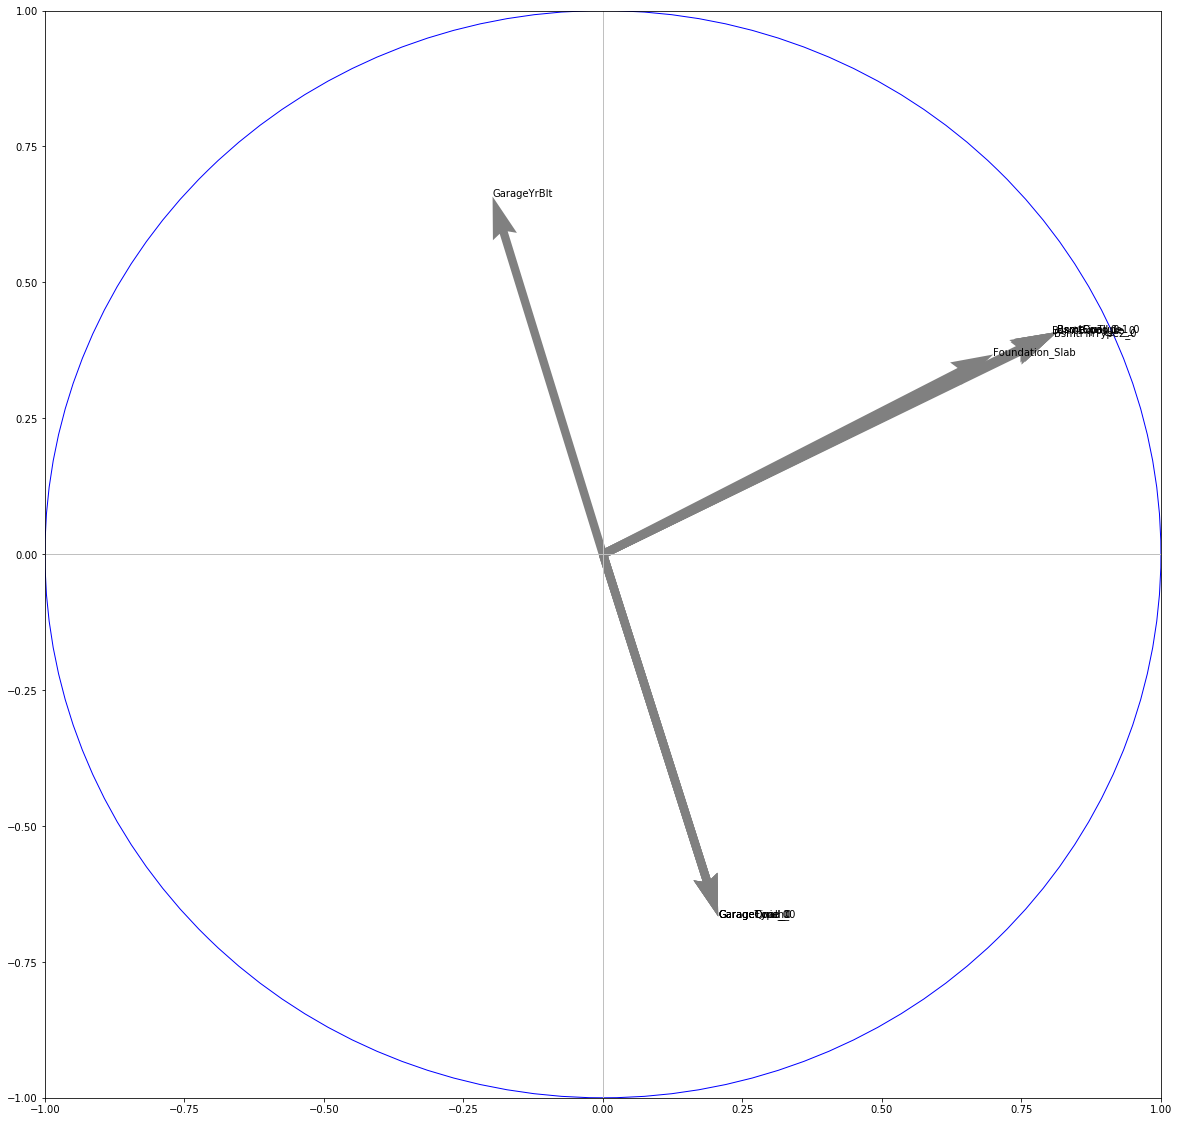

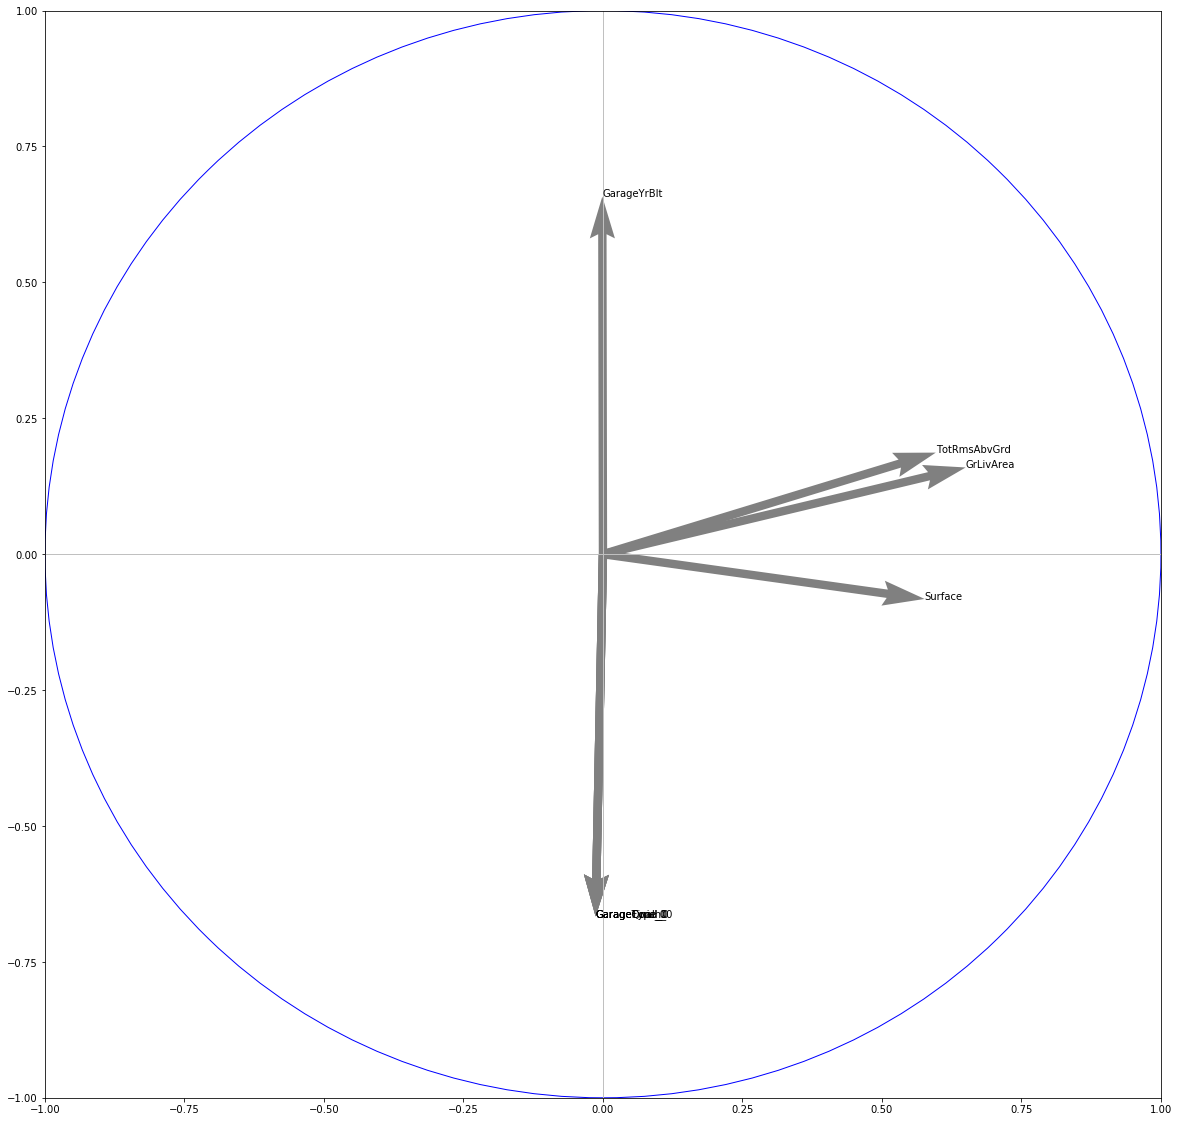

In [40]:
i = 0
for i in range(7):
    #cercle des corrélations
    fig, axes = plt.subplots(figsize=(20,20))
    axes.set_xlim(-1,1)
    axes.set_ylim(-1,1)
    #affichage des étiquettes (noms des variables)
    for j in range(nbr_values[i]):
        plt.annotate(labels[i][j],(my_axes[i][j][0],my_axes[i][j][1]))
        plt.quiver(my_axes[i][j][0],my_axes[i][j][1], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

    #ajouter les axes
    plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

    #ajouter un cercle
    cercle = plt.Circle((0,0),1,color='blue',fill=False)
    axes.add_artist(cercle)
    #affichage
    plt.show()

## Cosinus square variables

In [41]:
cos2var = corvar**2
print(pd.DataFrame({'id':data_ok.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2],'COS2_4':cos2var[:,3],'COS2_5':cos2var[:,4],'COS2_6':cos2var[:,5]}))

                        id    COS2_1    COS2_2        COS2_3        COS2_4  \
0               MSSubClass  0.002137  0.085634  7.037001e-04  2.722026e-02   
1              LotFrontage  0.017570  0.008215  2.141322e-04  4.613650e-02   
2                  LotArea  0.019713  0.043346  1.750660e-02  1.698221e-01   
3              OverallQual  0.641513  0.029646  6.791689e-03  4.223439e-02   
4              OverallCond  0.046616  0.036778  6.525167e-02  5.141702e-03   
5                YearBuilt  0.686537  0.000359  4.374935e-02  1.241991e-01   
6             YearRemodAdd  0.446569  0.055965  4.152967e-04  2.072886e-02   
7               MasVnrArea  0.185296  0.000494  3.621604e-03  3.029488e-02   
8               BsmtFinSF1  0.114054  0.124012  1.641395e-02  6.732122e-03   
9               BsmtFinSF2  0.002459  0.103718  7.678027e-03  1.375859e-02   
10               BsmtUnfSF  0.072775  0.105590  5.357359e-02  2.023421e-02   
11             TotalBsmtSF  0.384812  0.021446  6.211559e-03  7.

## contributions
* We show for the first five axes

In [42]:
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]

print(pd.DataFrame({'id':data_ok.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3],'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5]}))

                        id         CTR_1     CTR_2         CTR_3  \
0               MSSubClass  1.073656e-04  0.009525  9.390712e-05   
1              LotFrontage  8.826871e-04  0.000914  2.857545e-05   
2                  LotArea  9.903667e-04  0.004821  2.336214e-03   
3              OverallQual  3.222870e-02  0.003297  9.063350e-04   
4              OverallCond  2.341946e-03  0.004091  8.707682e-03   
5                YearBuilt  3.449064e-02  0.000040  5.838248e-03   
6             YearRemodAdd  2.243501e-02  0.006225  5.542037e-05   
7               MasVnrArea  9.309019e-03  0.000055  4.832945e-04   
8               BsmtFinSF1  5.729923e-03  0.013793  2.190403e-03   
9               BsmtFinSF2  1.235244e-04  0.011536  1.024615e-03   
10               BsmtUnfSF  3.656136e-03  0.011744  7.149270e-03   
11             TotalBsmtSF  1.933241e-02  0.002385  8.289180e-04   
12                1stFlrSF  1.333676e-02  0.002926  7.880080e-03   
13                2ndFlrSF  1.700594e-03  0.0113